# Advanced Encryption Standard (AES) Cipher to Encrypt an Image Message
By Heidi Nguyen

- Advanced Encryption Standard (AES) was standardized by NIST in U.S. FIPS PUB 197 (FIPS 197) in 2001 after a lengthy competition. AES has stood the test of time and cryptographic analysis to provide cryptographically strong functionality.
- The goal of this exercise is to write (or find and heavily document) an AES 128 bit Python implementation and then to compare the performance of three different modes of operation using AES to encrypt and render on the display a large jpg file.
- First obtain a Python implementation of AES-128, in this case an image file. 
- Then implement the following three modes of operation for AES: ECB, CBC and Counter Mode. Perform an encryption using each of these three modes on a jpg file. 
- After encryption, render on the display the results of the encryption.

In [72]:
# Python implementation of AES-128 with three modes of operation for AES:
# ECB (Electronic Codebook), CBC (Cipher-Block Chaining)  and CTR (Counter Mode).
# Supported key sizes 128-bit, 192-bit, and 256-bit long

#libraries
from PIL import Image
import sys, os, random, struct, hashlib
from Crypto.Cipher import AES
from Crypto.Util import Counter
from Crypto import Random
from argparse import ArgumentParser # this is better than using sys.argv
#from cipher_hack import getMessage


IV_SIZE = 16
BLOCK_SIZE = 16
PAD_KEY = '12343438098230809809808098098098' # Pad for short keys

def getMessage():
    try:
        print('Enter your message:')
        return raw_input()
    except SyntaxError: # in the case an empty string is enter
        return ""


def randomKey(key_size):
    # To generate a random key -- 128 bits (16 bytes), 192 bits (24 bytes) or 256 bits (32 bytes) long
    import os
    # 128 bit, 192 bit and 256 bit keys
    key_128 = os.urandom(16)
    key_192 = os.urandom(24)
    key_256 = os.urandom(32)
    
    if (key_size == 128):
        return key_128
    elif (key_size == 192):
        return key_192
    elif (key_size == 256):
        return key_192
    else:
        print "key_size must be 128 bits (16 bytes), 192 bits (24 bytes) or 256 bits (32 bytes) long"

# function to prompt user to enter a key
def prompt_key(key_size): # Key must be one of 16/24/32 bytes in length
    print "Please enter %d or less bytes length key" %key_size
    key_input = getMessage()
    #     while len(key) != 16:
    #         print "enter ascii 16 bytes length key"
    #         key = getMessage()
    key = (key_input + PAD_KEY)[:key_size]
    return key

# check key size
def checkKeySize(s):
    import sys
    size = sys.getsizeof(s)
    # ASCII characters use 1 byte each, Chinese or other language may use up to 3 bytes each
    #byte_size = len(s.encode("utf8")) # "key_rand34987466" is 16 bytes , #"你好" is 6 bytes
    byte_size = len(s)
#     return byte_size

# function to encrypt image
def encrypt(input_filename, output_filename, cipher_mode, key): # Key must be one of 16/24/32 bytes in length.
    """Encrypt an image file and write out the results as a JPEG."""
    
    input_image = Image.open(input_filename).convert('RGBA').convert('RGB')
    #     pix = input_image.load()
    
    # Initialization vector: #IV = 16 * '\x00'
    # IV must be block_size (=16) bytes long for encryption and block_size +2 bytes for decryption.
    # In practice, this IV buffer should be random and of multiple of 16 bytes .
    # IV only used for CBC mode: iv = Random.new().read(AES.block_size)
    iv = os.urandom(IV_SIZE)
    
    # Create 128 bit counter for encryptor
    # if iv=8, then ctr_e = Counter.new(64, prefix=iv), in this case is 16 => need iv[:8]
    # also: ctr_e = Counter.new(128)
    ctr_e = Counter.new(64, prefix=iv[:8])
    
    # set mode:
    # mode = AES.MODE_CBC if cipher_mode == 'CBC' else AES.MODE_ECB
    if  cipher_mode == "CBC":
        mode = AES.MODE_CBC
        # create a new AES encryptor object with
        aes = AES.new(key, mode, iv)
    elif cipher_mode == "ECB":
        mode = AES.MODE_ECB
        #create a new AES encryptor object with
        aes = AES.new(key, mode)
    elif cipher_mode == "CTR":
        mode = AES.MODE_CTR
        #create a new AES encryptor object with
        aes = AES.new(key, mode, counter=ctr_e)
    
    # image_string = bytes(input_image.tostring()) # tostring() has been removed, call tobytes() instead.
    image_string = input_image.tobytes()
    
    # The input string must be padded to the input block size.
    image_padding_length = BLOCK_SIZE - len(image_string) % BLOCK_SIZE
    image_string += image_padding_length * "~"

    # generate the encrypted image string
    encrypted = aes.encrypt(image_string) #  aes = AES.new(key, mode, iv)
    
    # create an image from the encrypted string
    encrypted_img = Image.frombuffer("RGB", input_image.size, encrypted, 'raw',
                                     "RGB", 0, 1) # width = input_image.size[0], height = input_image.size[1]
        
    # create and save the output image
    encrypted_img.save(output_filename, 'JPEG') # 'JPEG' # 'PNG'
                                     
    print("Encrypted using AES in " + cipher_mode + " mode and saved to \"" +
                                           output_filename + "\"!")
    return None

if __name__ == "__main__":
    
    # Having keys of exact length isn't very convenient, as you sometimes want to use some mnemonic password for the key.
    # In this case I recommend picking a password and then using the SHA-256 digest algorithm from hashlib
    # to generate a 32-byte key from it. Just replace the assignment to key with:
    # password = 'kitty'
    # key = hashlib.sha256(password).digest() # SHA-256
    # password = 'kitty'
    # get a key of 16 bytes long
    key = randomKey(128) # # Key must be one of 16/24/32 bytes in length.
    
    # Set wd
    path = os.chdir("/Users/heidinguyen/Downloads/")
    path = "/Users/heidinguyen/Downloads/"
    cipher_mode_list = ["ECB", "CBC", "CTR"]
    #     timestr = time.strftime("%Y%m%d-%H%M%S")
    
    filename_list = ["owl.jpg", "Chess.jpg"] # "Penguin.jpg","Chess.jpg"
    
    
    output_filename_list = [] 
    for filename in filename_list:
        output_filename_list.append(filename)
        for each in cipher_mode_list:
            #str_file_ending = ".png" # file type
            input_filename = path + filename  
            cipher_mode = each #"CBC" 
            output_filename = path + cipher_mode + "_" + filename
            encrypt(input_filename, output_filename, cipher_mode,key) 
            output_filename_list.append(output_filename)
            

Encrypted using AES in ECB mode and saved to "/Users/heidinguyen/Downloads/ECB_owl.jpg"!
Encrypted using AES in CBC mode and saved to "/Users/heidinguyen/Downloads/CBC_owl.jpg"!
Encrypted using AES in CTR mode and saved to "/Users/heidinguyen/Downloads/CTR_owl.jpg"!
Encrypted using AES in ECB mode and saved to "/Users/heidinguyen/Downloads/ECB_Chess.jpg"!
Encrypted using AES in CBC mode and saved to "/Users/heidinguyen/Downloads/CBC_Chess.jpg"!
Encrypted using AES in CTR mode and saved to "/Users/heidinguyen/Downloads/CTR_Chess.jpg"!


In [73]:
# check the output image
output_filename_list

['owl.jpg',
 '/Users/heidinguyen/Downloads/ECB_owl.jpg',
 '/Users/heidinguyen/Downloads/CBC_owl.jpg',
 '/Users/heidinguyen/Downloads/CTR_owl.jpg',
 'Chess.jpg',
 '/Users/heidinguyen/Downloads/ECB_Chess.jpg',
 '/Users/heidinguyen/Downloads/CBC_Chess.jpg',
 '/Users/heidinguyen/Downloads/CTR_Chess.jpg']

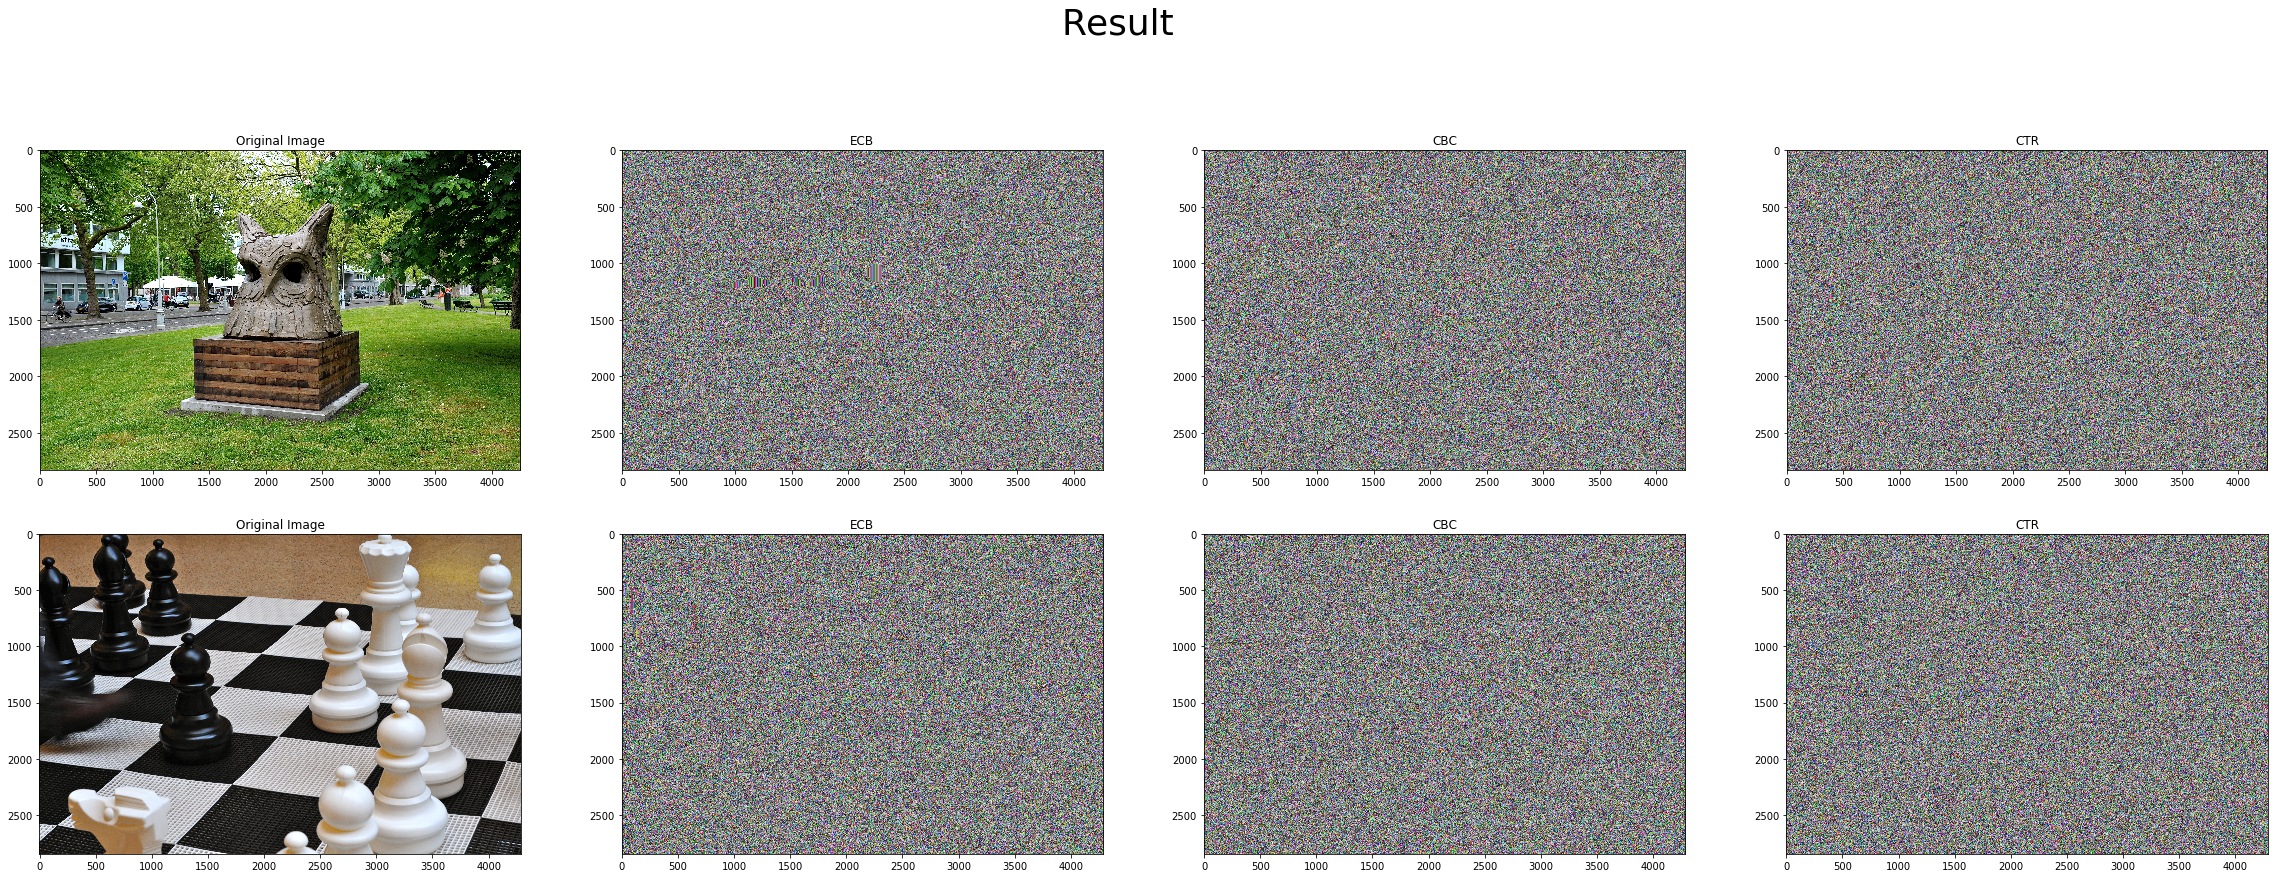

In [78]:
# load in the images 
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize=(40,20))
columns = 4

# fig,ax = plt.subplots(2,5) 

plt.suptitle('Result', fontsize=36)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
title = ["Original Image", "ECB", "CBC", "CTR"]

for i, image in enumerate(output_filename_list):
    plt.subplot(len(output_filename_list) / columns + 1, columns, i + 1)
    plt.title(title[i%4])
    display = Image.open(image )
    plt.imshow(display)  


•  With ECB mode, because identical plaintext (pixels string) blocks are encrypted into identical ciphertext (pixels string) blocks, it does not hide the image patterns well and it doesn't provide confidentiality. The bigger the color contrasts in the image, the worse the hiding is with ECB mode. 

• With CBC and CTR modes, the performance are the same. The pattern of the image is hidden well. 


Reference: 
    
    1. https://github.com/ricmoo/pyaes -- pure Python code using AES
    2. https://github.com/pakesson/diy-ecb-penguin -- encrypt ECB Penguin
    3. https://github.com/cahlen/IMEncrypt/blob/master/imencrypt.py --  encrypt and decrypt ECB Penguin
    4. https://github.com/AtheMathmo/ImageEncryptor -- pure Python code for AES using 2-key permutation system
    5. https://github.com/dlitz/pycrypto -- source code of Crypto
    6. https://github.com/cahlen/IMEncrypt -- using Crypto.Cipher
    7. https://eli.thegreenplace.net/2010/06/25/aes-encryption-of-files-in-python-with-pycrypto -- using Crypto.Cipher
    8. https://www.dlitz.net/software/pycrypto/ -- a useful, PyCrypto, a crypto library implemented in C with Python bindings:
    9. https://eli.thegreenplace.net/2010/06/25/aes-encryption-of-files-in-python-with-pycrypto
    10. https://docs.python.org/3.4/howto/regex.html -- Regex
    11. https://www.rapidtables.com/code/text/ascii-table.html -- ASCII table
    12. https://en.wikipedia.org/wiki/Advanced_Encryption_Standard
    13. https://en.wikipedia.org/wiki/Block_cipher_mode_of_operation
